In [63]:
import pandas as pd
import numpy as np

Data = pd.read_csv("C:\\Users\\Abhiruchi\\Downloads\\usahousing\\USA_Housing.csv")
Train = Data[: int(.70*(len(Data)))]
Test = Data[int(.70*(len(Data))) :]

In [64]:
Train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [65]:
TrainPrice = (np.array(Train['Price']))/np.max(Train['Price'])
TrainAreaPopulation = (np.array(Train['Area Population']))/ np.max(Train['Area Population'])

In [66]:
m = 0.2
c = 0.5

In [67]:
default_line = np.array([(m*x)+c for x in TrainAreaPopulation])

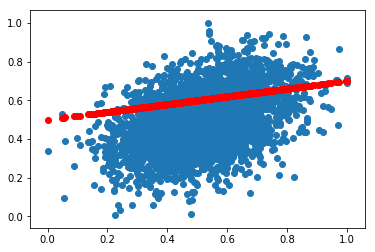

In [68]:
from matplotlib import pyplot as plt

plt.scatter(TrainAreaPopulation, TrainPrice)
plt.scatter(TrainAreaPopulation, default_line, color="red")
plt.show()

#%matplotlib notebook


# Gradient Descent

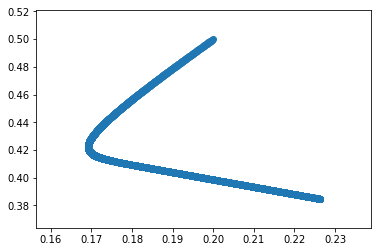

In [96]:
Theta1Old = m
Theta2Old = c
alpha = .001
Theta1Gradient = []
Theta2Gradient = []

for i in range(100000):
    Theta1New = Theta1Old - ((alpha*2*(sum((((Theta1Old*TrainAreaPopulation)+Theta2Old) - TrainPrice) * TrainAreaPopulation)))/len(Train))
    Theta2New = Theta2Old - ((alpha*2*(sum(((Theta1Old*TrainAreaPopulation)+Theta2Old) - TrainPrice) ))/len(Train))
    Theta1Gradient.append(Theta1New)
    Theta2Gradient.append(Theta2New)
    #print(Theta1New, Theta2New)
    if (Theta1Old == Theta1New):
        break
    
    Theta1Old = Theta1New
    Theta2Old = Theta2New

plt.scatter(Theta1Gradient, Theta2Gradient)
plt.show()

In [97]:
Predicted_Price_Train = np.array([(Theta1Old*x)+Theta2Old for x in TrainAreaPopulation])
Predicted_Price_Train = Predicted_Price_Train/ max(Predicted_Price_Train)

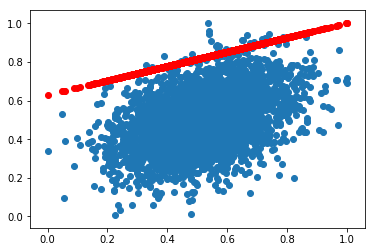

In [98]:
plt.scatter(TrainAreaPopulation, TrainPrice)
plt.scatter(TrainAreaPopulation, Predicted_Price_Train, color="red")
plt.show()

#%matplotlib notebook

# Testing Phase

In [91]:
TestPrice = (np.array(Test['Price']))/np.max(Test['Price'])
TestAreaPopulation = (np.array(Test['Area Population']))/ np.max(Test['Area Population'])

In [92]:
Predicted_Price_Test = np.array([(Theta1Old*x)+Theta2Old for x in TestAreaPopulation])
Predicted_Price_Test = Predicted_Price_Test/max(Predicted_Price_Test)

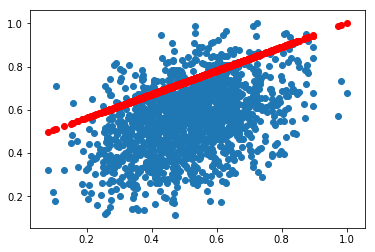

In [93]:
plt.scatter(TestAreaPopulation, TestPrice)
plt.scatter(TestAreaPopulation, Predicted_Price_Test, color="red")
plt.show()

In [94]:
TestPriceError = (sum(list(map(lambda x,y : x-y, Predicted_Price_Test,TestPrice)))/ len(Test))*100

TestPriceError

18.590818947521836

In [95]:
TrainPriceError = (sum(list(map(lambda x,y : x-y, Predicted_Price_Train,TrainPrice)))/ len(Train))*100

TrainPriceError

23.678470180347077